In [1]:
import numpy as np
from scipy import sparse

In [2]:
def sparse_dim_connectivity(dim_con):
    """
    Create a sparse matrix capturing the connectivity of a conjunction
    of dimensions.
    """
    # get length of each dim by looping over the connectivity matrices
    # passed in
    dlen = [d.shape[0] for d in dim_con]

    # prepare for full connectivity matrix
    nelements = np.prod(dlen)

    # get the indices
    ind = np.indices(dlen)

    # reshape them
    dind = [ind[i].reshape((nelements, 1)) for i in range(ind.shape[0])]

    # fill the rows and columns
    rows = []
    cols = []

    # loop to create mix of
    for i in range(len(dind)):
        # get the connected elements for that dimension
        r, c = np.nonzero(dim_con[i])

        # loop over them
        for j in range(len(r)):
            # extend the row/col connections
            rows.extend(np.nonzero(dind[i] == r[j])[0])
            cols.extend(np.nonzero(dind[i] == c[j])[0])

    # create the sparse connectivity matrix
    data = np.ones(len(rows))
    cmat = sparse.coo_matrix((data, (rows, cols)),
                             shape=(nelements, nelements))

    return cmat

def simple_neighbors_1d(n):
    """
    Return connectivity for simple 1D neighbors.
    """
    c = np.zeros((n, n))
    c[np.triu_indices(n, 1)] = 1
    c[np.triu_indices(n, 2)] = 0
    return c

In [3]:
connectivity = sparse_dim_connectivity([simple_neighbors_1d(n)
                                                for n in (2,3,4)])

In [4]:
connectivity

<24x24 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in COOrdinate format>

In [5]:
connectivity.row

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3, 12,
       13, 14, 15,  4,  5,  6,  7, 16, 17, 18, 19,  0,  4,  8, 12, 16, 20,
        1,  5,  9, 13, 17, 21,  2,  6, 10, 14, 18, 22], dtype=int32)

In [6]:
connectivity.col

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  4,  5,  6,  7, 16,
       17, 18, 19,  8,  9, 10, 11, 20, 21, 22, 23,  1,  5,  9, 13, 17, 21,
        2,  6, 10, 14, 18, 22,  3,  7, 11, 15, 19, 23], dtype=int32)

In [7]:
connectivity.toarray()

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

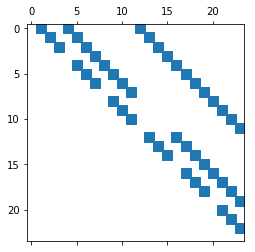

In [9]:
plt.spy(connectivity)

In [10]:
connectivity.col[connectivity.row==4]

array([16,  8,  5], dtype=int32)

In [11]:
connectivity.row[connectivity.col==4]

array([0], dtype=int32)

In [12]:
np.append(connectivity.col[connectivity.row==4],connectivity.row[connectivity.col==4])

array([16,  8,  5,  0], dtype=int32)